# __09 Tidy Data with tidyr__

In [1]:
# libraries
library(tidyverse)

# config
repr_html.tbl_df <- function(obj, ..., rows = 6) repr:::repr_html.data.frame(obj, ..., rows = rows)
options(dplyr.summarise.inform = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [3]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
⋮,⋮,⋮,⋮
China,1999,population,1272915272
China,2000,cases,213766
China,2000,population,1280428583


In [4]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [5]:
table4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [6]:
table4b

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


These are all representations of the same underlying data, but they
are not equally easy to use. One dataset, the tidy dataset, will be
much easier to work with inside the tidyverse.
There are three interrelated rules which make a dataset tidy:

1. Each variable must have its own column
2. Each observations must have its own row
3. Each value must have its own cell

Why ensure that your data is tidy? There are two main advantages:

* There’s a general advantage to picking one consistent way of
storing data. If you have a consistent data structure, it’s easier to
learn the tools that work with it because they have an underly‐
ing uniformity.

* There’s a specific advantage to placing variables in columns
because it allows R’s vectorized nature to shine. As you learned
in “Useful Creation Functions” on page 56 and “Useful Summary Functions” on page 66, most built-in R functions work
with vectors of values. That makes transforming tidy data feel
particularly natural.

`dplyr`, `ggplot2`, and all the other packages in the `tidyverse` are
designed to work with tidy data. Here are a couple of small examples
showing how you might work with `table1` :

In [7]:
# compute rate per 10,000
table1 %>%
    mutate(rate = cases / population * 10000)

country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


In [8]:
# compute cases per year
table1 %>%
    count(year, wt = cases)

year,n
<int>,<int>
1999,250740
2000,296920


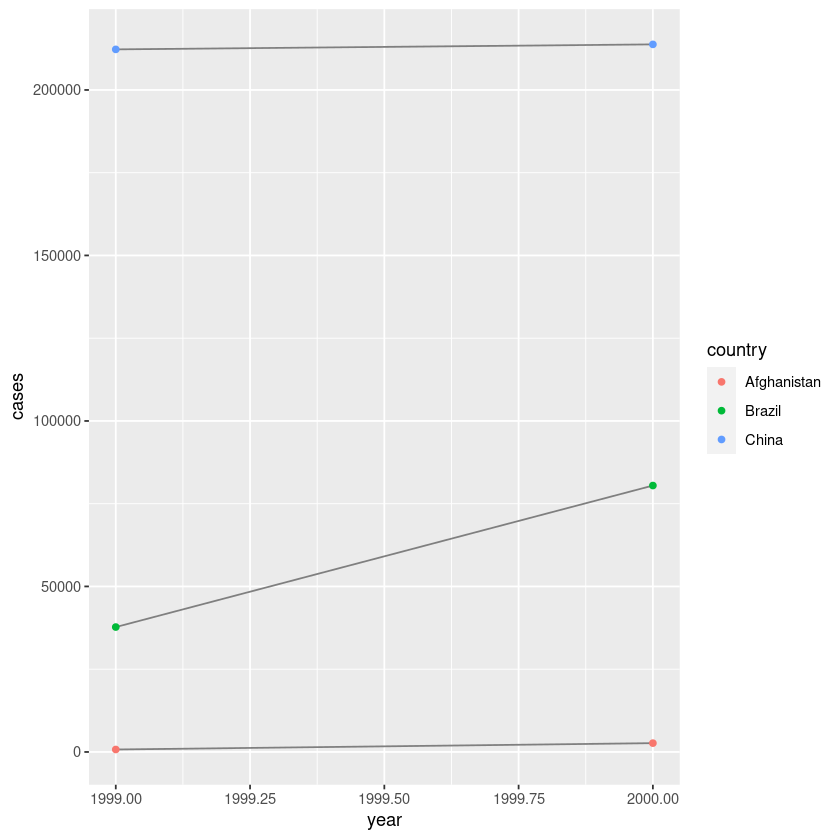

In [9]:
# visualize changes over time
library(ggplot2)
ggplot(table1, aes(year, cases)) +
    geom_line(aes(group = country), color = 'grey50') +
    geom_point(aes(color = country))

Compute the rate for table2 , and table4a + table4b . You will
need to perform four operations:

1. Extract the number of TB cases per country per year.
2. Extract the matching population per country per year.
3. Divide cases by population, and multiply by 10,000.
4. Store back in the appropriate place.

Which representation is easiest to work with? Which is hardest?
Why?

In [10]:
t2_cases <- filter(table2, type == "cases") %>%
  rename(cases = count) %>%
  arrange(country, year)

t2_population <- filter(table2, type == "population") %>%
  rename(population = count) %>%
  arrange(country, year)

In [11]:
t2_cases_per_cap <- tibble(
  year = t2_cases$year,
  country = t2_cases$country,
  cases = t2_cases$cases,
  population = t2_population$population
) %>%
  mutate(cases_per_cap = (cases / population) * 10000) %>%
  select(country, year, cases_per_cap)

In [12]:
t2_cases_per_cap <- t2_cases_per_cap %>%
  mutate(type = "cases_per_cap") %>%
  rename(count = cases_per_cap)

In [13]:
bind_rows(table2, t2_cases_per_cap) %>%
  arrange(country, year, type, count)

country,year,type,count
<chr>,<int>,<chr>,<dbl>
Afghanistan,1999,cases,7.450000e+02
Afghanistan,1999,cases_per_cap,3.727410e-01
Afghanistan,1999,population,1.998707e+07
⋮,⋮,⋮,⋮
China,2000,cases,2.137660e+05
China,2000,cases_per_cap,1.669488e+00
China,2000,population,1.280429e+09


In [14]:
table4c <-
  tibble(
    country = table4a$country,
    `1999` = table4a[["1999"]] / table4b[["1999"]] * 10000,
    `2000` = table4a[["2000"]] / table4b[["2000"]] * 10000
  )
table4c

country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,0.372741,1.294466
Brazil,2.193930,4.612363
China,1.667495,1.669488


## __Spreading and Gathering__

The first step is always to figure out what the variables and observa‐
tions are. Sometimes this is easy; other times you’ll need to consult
with the people who originally generated the data. The second step
is to resolve one of two common problems:
* One variable might be spread across multiple columns.
* One observation might be scattered across multiple rows.

Typically a dataset will only suffer from one of these problems; it’ll
only suffer from both if you’re really unlucky! To fix these problems,
you’ll need the two most important functions in tidyr: `gather()`
and `spread()` .

### __Gathering__

A common problem is a dataset where some of the column names
are not names of variables, but values of a variable. Take table4a ;
the column names 1999 and 2000 represent values of the year variable, and each row represents two observations, not one:

In [15]:
table4a

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


To tidy a dataset like this, we need to gather those columns into a
new pair of variables. To describe that operation we need three
parameters:
1. The set of columns that represent values, not variables. In this
example, those are the columns 1999 and 2000 .
2. The name of the variable whose values form the column names.
I call that the `key` , and here it is year
3. The name of the variable whose values are spread over the cells.
I call that `value` , and here it’s the number of cases .

In [16]:
table4a %>%
    gather(`1999`, `2000`, key  = 'year', value = 'cases')

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


In [17]:
table4b %>%
    gather(`1999`, `2000`, key = 'year', value = 'population')

country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


To combine the tidied versions of table4a and table4b into a single
tibble, we need to use `dplyr::left_join()`

In [18]:
tidy4a <- table4a %>%
    gather(`1999`, `2000`, key = 'year', value = 'cases')

tidy4b <- table4b %>%
    gather(`1999`, `2000`, key = 'year', value = 'population')

left_join(tidy4a, tidy4b)

Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Brazil,1999,37737,172006362
China,1999,212258,1272915272
Afghanistan,2000,2666,20595360
Brazil,2000,80488,174504898
China,2000,213766,1280428583


### __Spreading__

Spreading is the opposite of gathering. You use it when an observa‐
tion is scattered across multiple rows. For example, take table2 —an
observation is a country in a year, but each observation is spread
across two rows:

In [19]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
⋮,⋮,⋮,⋮
China,1999,population,1272915272
China,2000,cases,213766
China,2000,population,1280428583


To tidy this up, we first analyze the representation in a similar way
to `gather()` . This time, however, we only need two parameters:

1. The column that contains variable names, the `key` column.
Here, it’s type .
2. The column that contains values forms multiple variables, the
`value` column. Here, it’s count .

In [20]:
spread(table2, key = type, value = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


As you might have guessed from the common key and value argu‐
ments, `spread()` and `gather()` are complements. `gather()` makes
wide tables narrower and longer; `spread()` makes long tables
shorter and wider.

Why are `gather()` and `spread()` not perfectly symmetrical?
Carefully consider the following example:

In [21]:
stocks <- tibble(
    year = c(2015, 2015, 2016, 2016),
    half = c(1, 2, 1, 2),
    return = c(1.88, 0.59, 0.92, 0.17)
)

In [22]:
stocks

year,half,return
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,0.59
2016,1,0.92
2016,2,0.17


In [23]:
stocks %>%
    spread(year, return) %>%
    gather("year", "return", `2015`:`2016`)

half,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
2,2015,0.59
1,2016,0.92
2,2016,0.17


while `stocks` have all their columns as numeric datatype,
the transformed `stocks` have the `year` column to `chr` dataype. It looks like
the spreading of the columns are converted to char for default (as they will be names of columns, which makes sense). When gathering back, the datatype of `year` will be a `chr` and we need an extra step to trnasform it back as the original.

In [24]:
stocks %>%
    spread(year, return) %>%
    gather("year", "return", `2015`:`2016`) %>%
    mutate(year = as.numeric(year))

half,year,return
<dbl>,<dbl>,<dbl>
1,2015,1.88
2,2015,0.59
1,2016,0.92
2,2016,0.17


2. Why does this code fail?

In [25]:
table4a %>%
    gather(1999, 2000, key = 'year', value = 'cases')

ERROR: Error: Can't subset columns that don't exist.
[31m✖[39m Locations 1999 and 2000 don't exist.
[34mℹ[39m There are only 3 columns.


There are unexpected names or the column numbers do not exist. We need backticks to specify columns names which do not comply with the standard format of col names.


In [26]:
table4a %>%
    gather(`1999`, `2000`, key = 'year', value = 'cases')

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


3. Why does spreading this tibble fail? How could you add a new
column to fix the problem?

In [27]:
people <- tribble(
    ~name, ~key, ~value,
    'Phillip Woods', 'age', 45,
    "Phillip Woods", "height", 186,
    "Phillip Woods", "age",50,
    "Jessica Cordero", "age",37,
    "Jessica Cordero", "height", 156
)

In [28]:
people

name,key,value
<chr>,<chr>,<dbl>
Phillip Woods,age,45
Phillip Woods,height,186
Phillip Woods,age,50
Jessica Cordero,age,37
Jessica Cordero,height,156


In [29]:
spread(people, key = key, value = value)

ERROR: Error: Each row of output must be identified by a unique combination of keys.
Keys are shared for 2 rows:
* 1, 3



We cannot be specific enough as to make unique combinations of the data because
of multiple values for one key. If adding another column, such as id or date, will solve this ambiguity.

In [30]:
people <- people %>%
    mutate(id = 1:5)

In [31]:
people

name,key,value,id
<chr>,<chr>,<dbl>,<int>
Phillip Woods,age,45,1
Phillip Woods,height,186,2
Phillip Woods,age,50,3
Jessica Cordero,age,37,4
Jessica Cordero,height,156,5


In [32]:
spread(people, key = key, value = value)

name,id,age,height
<chr>,<int>,<dbl>,<dbl>
Jessica Cordero,4,37,NA
Jessica Cordero,5,NA,156
Phillip Woods,1,45,NA
Phillip Woods,2,NA,186
Phillip Woods,3,50,NA


## __Separating and Pull__

So far you’ve learned how to tidy table2 and table4 , but not
table3 . table3 has a different problem: we have one column ( `rate` )
that contains two variables ( `cases` and `population` ). To fix this
problem, we’ll need the `separate()` function. You’ll also learn about
the complement of `separate()` : `unite()` , which you use if a single
variable is spread across multiple columns.

### __Separate__

`separate()` pulls apart one column into multiple columns, by split‐
ting wherever a separator character appears. Take `table3` :

In [33]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


The rate column contains both cases and population variables,
and we need to split it into two variables. `separate()` takes the
name of the column to separate, and the names of the columns to
separate into,

In [34]:
table3 %>%
    separate(rate, into = c('cases', 'population'))

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


By default, `separate()` will split values wherever it sees a non-
alphanumeric character (i.e., a character that isn’t a number or let‐
ter). For example, in the preceding code, `separate()` split the values
of rate at the forward slash characters. If you wish to use a specific
character to separate a column, you can pass the character to the sep
argument of `separate()` .

In [35]:
table3 %>%
    separate(rate, into = c('cases', 'population'), sep = '/')

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [36]:
# try to convert to better types
table3 %>%
    separate(rate,
             into = c('cases', 'population'),
             convert = TRUE)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


You can also pass a vector of integers to sep . `separate()` will inter‐
pret the integers as positions to split at. Positive values start at 1 on
the far left of the strings; negative values start at –1 on the far right
of the strings. When using integers to separate strings, the length of
sep should be one less than the number of names in into .
You can use this arrangement to separate the last two digits of each
year. This makes this data less tidy, but is useful in other cases, as
you’ll see in a little bit:

In [37]:
table3 %>%
    separate(year,
             into = c('centuty', 'year'),
             sep = 2)

country,centuty,year,rate
<chr>,<chr>,<chr>,<chr>
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


### __Unite__

`unite()` is the inverse of `separate()` : it combines multiple columns
into a single column.

In [38]:
table5 %>%
    unite(new, century, year)

country,new,rate
<chr>,<chr>,<chr>
Afghanistan,19_99,745/19987071
Afghanistan,20_00,2666/20595360
Brazil,19_99,37737/172006362
Brazil,20_00,80488/174504898
China,19_99,212258/1272915272
China,20_00,213766/1280428583


In this case we also need to use the sep argument. The default will
place an underscore ( `_` ) between the values from different columns.
Here we don’t want any separator so we use `""`

In [39]:
table5 %>%
    unite(new, century, year, sep = "")

country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


### __Missing Values__

Changing the representation of a dataset brings up an important
subtlety of missing values. Surprisingly, a value can be missing in
one of two possible ways:

* Explicitly, i.e., flagged with NA .
* Implicitly, i.e., simply not present in the data.

In [40]:
stocks <- tibble(
    year = c(2015, 2015, 2015, 2015, 2016, 2016, 2016),
    qtr = c(1, 2, 3, 4, 2, 3, 4),
    return = c(1.88, 0.59, 0.35, NA, 0.92, 0.17, 2.66)
)

There are two missing values in this dataset:
* The return for the fourth quarter of 2015 is explicitly missing,
because the cell where its value should be instead contains NA .
* The return for the first quarter of 2016 is implicitly missing,
because it simply does not appear in the dataset.

One way to think about the difference is with this Zen-like koan: an
explicit missing value is the presence of an absence; an implicit
missing value is the absence of a presence.

The way that a dataset is represented can make implicit values
explicit. For example, we can make the implicit missing value
explicit by putting years in the columns:

In [41]:
stocks %>%
    spread(year, return)

qtr,2015,2016
<dbl>,<dbl>,<dbl>
1,1.88,NA
2,0.59,0.92
3,0.35,0.17
4,NA,2.66


Because these explicit missing values may not be important in other
representations of the data, you can set `na.rm = TRUE` in `gather()`
to turn explicit missing values implicit:

In [42]:
stocks %>%
    spread(year, return) %>%
    gather(year, return, `2015`:`2016`, na.rm = TRUE)

qtr,year,return
<dbl>,<chr>,<dbl>
1,2015,1.88
2,2015,0.59
3,2015,0.35
2,2016,0.92
3,2016,0.17
4,2016,2.66


Another important tool for making missing values explicit in tidy
data is `complete()` :

In [43]:
stocks %>%
    complete(year, qtr)

year,qtr,return
<dbl>,<dbl>,<dbl>
2015,1,1.88
2015,2,0.59
2015,3,0.35
⋮,⋮,⋮
2016,2,0.92
2016,3,0.17
2016,4,2.66


`complete()` takes a set of columns, and finds all unique combina‐
tions. It then ensures the original dataset contains all those values,
filling in explicit `NA` s where necessary

There’s one other important tool that you should know for working
with missing values. Sometimes when a data source has primarily
been used for data entry, missing values indicate that the previous
value should be carried forward:

In [44]:
treatment <- tribble(
    ~person, ~treatment, ~response,
    'Derrick Whitmore', 1, 7,
    NA, 2, 10,
    NA, 3, 9,
    "Katherine Burke", 1, 4
)

You can fill in these missing values with `fill()` . It takes a set of col‐
umns where you want missing values to be replaced by the most
recent nonmissing value (sometimes called last observation carried
forward):

In [45]:
treatment %>%
    fill(person)

person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
Derrick Whitmore,2,10
Derrick Whitmore,3,9
Katherine Burke,1,4


## __Case Study__

In [46]:
who

country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,⋯,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Afghanistan,AF,AFG,1980,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1981,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1982,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zimbabwe,ZW,ZWE,2011,152,784,2467,2071,780,377,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Zimbabwe,ZW,ZWE,2012,120,783,2421,2086,796,360,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Zimbabwe,ZW,ZWE,2013,NA,NA,NA,NA,NA,NA,⋯,2349,1206,1208,1252,2069,4649,3526,1453,811,725


In [47]:
who1 <- who %>%
    gather(new_sp_m014:newrel_f65,
           key = 'key',
           value = 'cases',
           na.rm = TRUE)

In [48]:
who1

country,iso2,iso3,year,key,cases
<chr>,<chr>,<chr>,<int>,<chr>,<int>
Afghanistan,AF,AFG,1997,new_sp_m014,0
Afghanistan,AF,AFG,1998,new_sp_m014,30
Afghanistan,AF,AFG,1999,new_sp_m014,8
⋮,⋮,⋮,⋮,⋮,⋮
Yemen,YE,YEM,2013,newrel_f65,360
Zambia,ZM,ZMB,2013,newrel_f65,669
Zimbabwe,ZW,ZWE,2013,newrel_f65,725


In [49]:
# study structure of the values
who1 %>%
    count(key)

key,n
<chr>,<int>
new_ep_f014,1032
new_ep_f1524,1021
new_ep_f2534,1021
⋮,⋮
newrel_m4554,184
newrel_m5564,185
newrel_m65,182


In [50]:
?who

who {tidyr},R Documentation


In [51]:
who2 <- who1 %>%
    mutate(key = str_replace(key, 'newrel', 'new_rel'))

In [52]:
who2

country,iso2,iso3,year,key,cases
<chr>,<chr>,<chr>,<int>,<chr>,<int>
Afghanistan,AF,AFG,1997,new_sp_m014,0
Afghanistan,AF,AFG,1998,new_sp_m014,30
Afghanistan,AF,AFG,1999,new_sp_m014,8
⋮,⋮,⋮,⋮,⋮,⋮
Yemen,YE,YEM,2013,new_rel_f65,360
Zambia,ZM,ZMB,2013,new_rel_f65,669
Zimbabwe,ZW,ZWE,2013,new_rel_f65,725


In [53]:
# we can seoarate the values in each code with
# two passes of spearate()
who3 <- who2 %>%
    separate(key, c('new', 'type', 'sexage'), sep = '_')
(who3)

country,iso2,iso3,year,new,type,sexage,cases
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
Afghanistan,AF,AFG,1997,new,sp,m014,0
Afghanistan,AF,AFG,1998,new,sp,m014,30
Afghanistan,AF,AFG,1999,new,sp,m014,8
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,YE,YEM,2013,new,rel,f65,360
Zambia,ZM,ZMB,2013,new,rel,f65,669
Zimbabwe,ZW,ZWE,2013,new,rel,f65,725


In [54]:
who3 %>%
    count(new)

new,n
<chr>,<int>
new,76046


In [55]:
who4 <- who3 %>%
    select(-new, -iso2, -iso3)

In [56]:
# Next we’ll separate sexage into sex and age by splitting after the
# first character:
who5 <- who4 %>%
    separate(sexage, c('sex', 'age'), sep = 1)
(who5)

country,year,type,sex,age,cases
<chr>,<int>,<chr>,<chr>,<chr>,<int>
Afghanistan,1997,sp,m,014,0
Afghanistan,1998,sp,m,014,30
Afghanistan,1999,sp,m,014,8
⋮,⋮,⋮,⋮,⋮,⋮
Yemen,2013,rel,f,65,360
Zambia,2013,rel,f,65,669
Zimbabwe,2013,rel,f,65,725


In [57]:
# wrapping up in one pipe
who %>%
    gather(code, value, new_sp_m014:newrel_f65, na.rm = TRUE) %>%
    mutate(code = str_replace(code, 'newrel', 'new_rel')) %>%
    separate(code, c("new", "var", "sexage")) %>%
    select(-new, -iso2, -iso3) %>%
    separate(sexage, c('sex', 'age'), sep = 1)

country,year,var,sex,age,value
<chr>,<int>,<chr>,<chr>,<chr>,<int>
Afghanistan,1997,sp,m,014,0
Afghanistan,1998,sp,m,014,30
Afghanistan,1999,sp,m,014,8
⋮,⋮,⋮,⋮,⋮,⋮
Yemen,2013,rel,f,65,360
Zambia,2013,rel,f,65,669
Zimbabwe,2013,rel,f,65,725
